In [5]:
import pandas as pd

# Load cleaned data
df = pd.read_csv('../data/noshow_data_clean.csv')

# Remove non-predictive columns
# Might reintroduce neighborhood later
col_drop = [
    'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'NoShow', 'Wait_Category', 'Neighbourhood'
]
df = df.drop(columns=col_drop, errors='ignore')

# Encoding
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

print("--- data types ---")
print(df.dtypes)

print("\n--- ML ready ---")
display(df.head())

--- data types ---
Gender            int64
Age               int64
Scholarship       int64
Hypertension      int64
Diabetes          int64
Alcoholism        int64
Handicap          int64
SMS_received      int64
WaitDays          int64
NoShow_numeric    int64
dtype: object

--- ML ready ---


,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitDays,NoShow_numeric
0,0,62,0,1,0,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0,0,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = df.drop(columns=['NoShow_numeric'])
y = df['NoShow_numeric']

# Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and fit model
model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced',random_state=42)
model.fit(X_train, y_train)
print("model trained")

y_pred = model.predict(X_test)

print("--- classification report ---")
print(classification_report(y_test, y_pred))

model trained
--- classification report ---
              precision    recall  f1-score   support

           0       0.92      0.54      0.68     17621
           1       0.31      0.81      0.45      4484

    accuracy                           0.59     22105
   macro avg       0.61      0.67      0.56     22105
weighted avg       0.79      0.59      0.63     22105



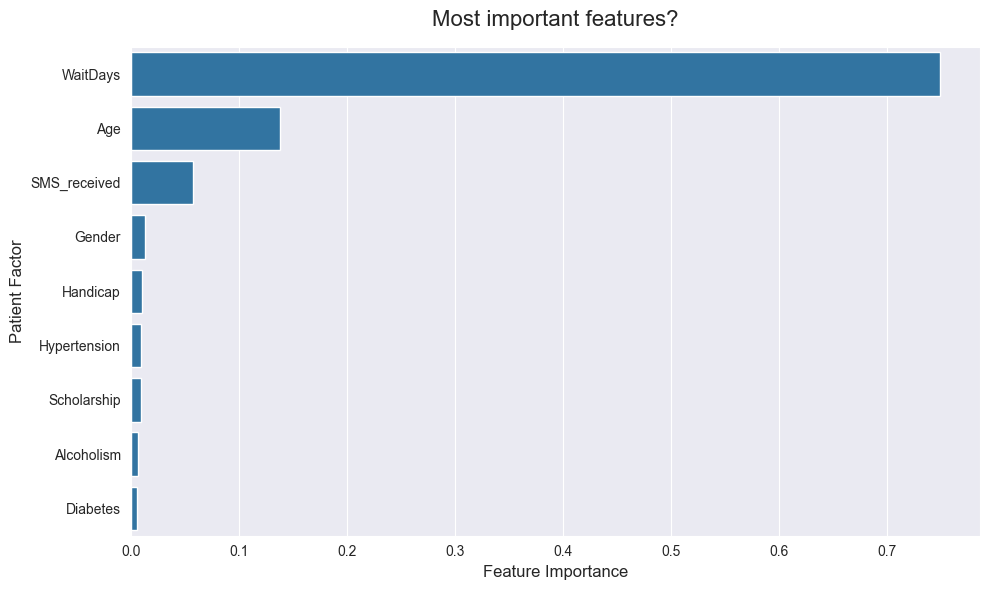

,feature,Importance (%)
8,WaitDays,74.8
1,Age,13.8
7,SMS_received,5.8
0,Gender,1.3
6,Handicap,1.1
3,Hypertension,0.9
2,Scholarship,0.9
5,Alcoholism,0.7
4,Diabetes,0.6


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch importance of each variable from the trained model
importances = model.feature_importances_
features = X.columns

# Collect and sort
feature_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_df = feature_df.sort_values('importance', ascending=False)

# Viz
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_df)

plt.title('Most important features?', fontsize=16, pad=15)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Patient Factor', fontsize=12)
plt.tight_layout()

plt.savefig('../notebooks/feature_importance.png', dpi=300, bbox_inches='tight')

plt.show()

feature_df['Importance (%)'] = (feature_df['importance'] * 100).round(1)
display(feature_df[['feature', 'Importance (%)']])


